In [46]:
import pandas as pd

In [47]:
df=pd.read_csv("hiring.csv")

In [48]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [49]:
from word2number import w2n
df.experience = df.experience.fillna("zero")
df.experience = df.experience.apply(w2n.word_to_num)
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [50]:
X=df.iloc[:,:-1].values
y=df.iloc[:,3].values


In [51]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer=SimpleImputer(missing_values=np.nan,strategy="mean" )
X[:,:-1]=imputer.fit_transform(X[:,:-1])
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred=model.predict(X_test)

In [55]:
y_pred

array([77815.51246537, 57354.0166205 , 44697.50692521])

In [56]:
y_test

array([72000, 60000, 45000], dtype=int64)

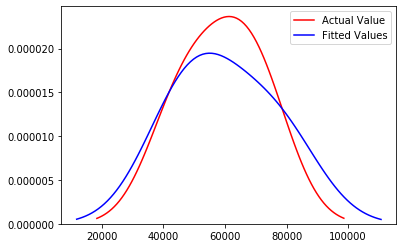

In [59]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)